# Subgradient Method

In [1]:
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import pandas as pd
import seaborn as sns

In [2]:
sns.set(context='notebook', style='darkgrid', font_scale=1)

In [3]:
def create_S(p,d,n):
    s = np.zeros(d*n)

    change_list = random.sample(range(int(d*n)),int(p*d*n))
    for i in change_list:
        s[i] = np.random.normal(0, 10)
    
    s = s.reshape(50,50)
    return s

In [4]:
def subgradient(X,U_0,V_0,alpha,flag = False, L_star = None):
    U = U_0
    V = V_0
    error_list = []
    if flag ==  False:
        error_list.append(np.linalg.norm(U.dot(V.T)-L_star, 2))
    if flag == True:
        error_list.append(np.sum(np.abs(X-np.dot(U, V.T))))
    for n in tqdm(range(2000)):
        grad = np.sign(X-U.dot(V.T))
        Ugrad = -grad.dot(V)
        Vgrad = -np.dot(grad.T,U)
        U = U-alpha/np.sqrt(n + 1)* Ugrad
        V = V -alpha/np.sqrt(n + 1)* Vgrad
        if flag ==  False:
            error_list.append(np.linalg.norm(U.dot(V.T)-L_star, 2))
        if flag == True:
            error_list.append(np.sum(np.abs(X-np.dot(U, V.T))))
    return U, V, error_list

## Artificial Dataset

In [5]:
U_0 = np.random.randn(50, 5)
V_0 = np.random.randn(50, 5)

In [6]:
U_star = np.random.randn(50, 5)
V_star = np.random.randn(50, 5)
L_star = U_star.dot(V_star.T)

In [7]:
s = create_S(0.3,50,50)
X = U_star.dot(V_star.T)+s
U_result,V_result,Error = subgradient(X,U_0,V_0,0.1,False, L_star)

100%|██████████| 2000/2000 [00:00<00:00, 4941.26it/s]


In [8]:
iteration = np.argmin(Error)
value = Error[iteration]
print('the iteration which achieves minimum error is {}'.format(iteration))
print('the minimum value is {}'.format(round(value,2)))

the iteration which achieves minimum error is 1744
the minimum value is 2.39


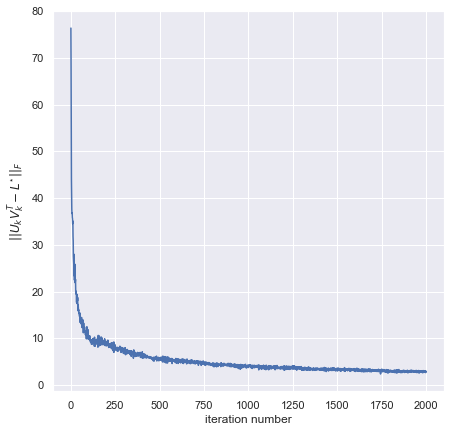

In [11]:
plt.figure(figsize=(7,7))
plt.plot(Error)
plt.xlabel('iteration number')
plt.ylabel(r"$||U_kV_k^{T}-L^{\star}||_F$")
plt.savefig('fig.pdf')
plt.show()

In [12]:
p = np.arange(0.1,0.85,0.1)
Result = []
for i in p:
    s = create_S(i,50,50) 
    X = U_star.dot(V_star.T)+s
    U_result,V_result, Error  = subgradient(X,U_0,V_0,0.1, False, L_star)
    Result.append(Error[1999])

100%|██████████| 2000/2000 [00:00<00:00, 4773.47it/s]


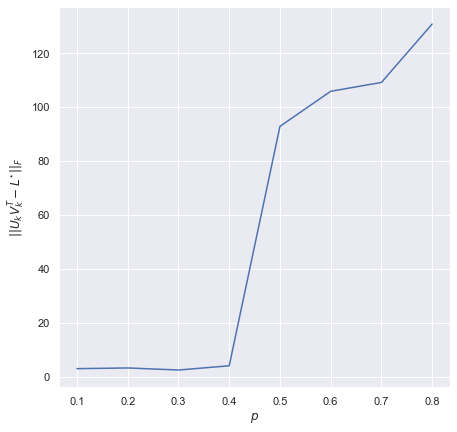

In [13]:
plt.figure(figsize=(7,7))
plt.plot(p,Result)
plt.xlabel(r'$p$')
plt.ylabel(r"$||U_kV_k^{T}-L^{\star}||_F$")
plt.savefig('Figure 2.pdf')
plt.show()

## The Yale-B02 dataset

In [14]:
import os
image_path = '../Data/Yale-B02/'
image_name = os.listdir(image_path)
image0 = Image.open(image_path+image_name[0])
image0 = np.array(image0)

n = len(image_name)
d = image0.size
r = 3
X = np.zeros((d, n))

for i in range(n):
    image = Image.open(image_path+image_name[i])
    image = np.array(image).reshape(d)
    X[:, i] = image
X.shape

(32256, 64)

In [15]:
U_0 = np.random.randn(d,r)
V_0 = np.random.randn(n,r)

In [16]:
U, V, error_list = subgradient(X, U_0, V_0,0.001,True)

100%|██████████| 2000/2000 [00:56<00:00, 35.55it/s]


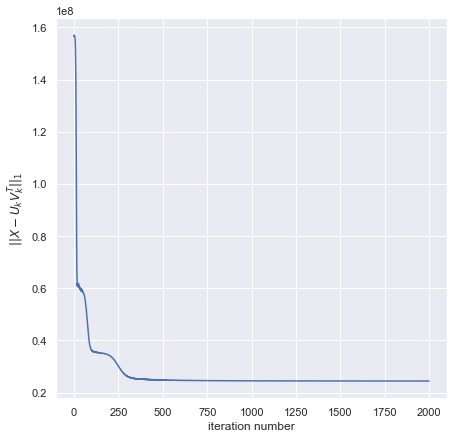

In [18]:
plt.figure(figsize=(7,7))
plt.plot(error_list)
plt.xlabel('iteration number')
plt.ylabel(r"$||X-U_kV_k^{T}||_1$")
plt.savefig('Figure 5.pdf')
plt.show()

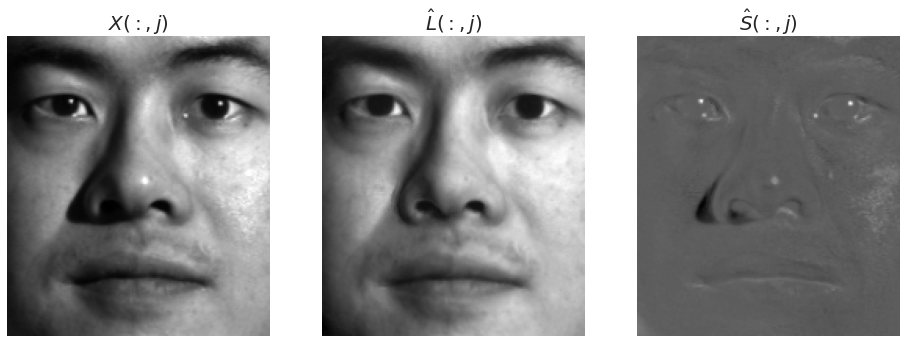

In [20]:
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(np.array(image0), cmap='gray')
plt.title(r"$X(:,j)$", size=20)
plt.axis('off')

plt.subplot(132)
New_iamge0 = np.dot(U, V.T)[:,0].reshape(192, 168)
plt.imshow(New_iamge0, cmap="gray")
plt.title(r"$\hat L(:,j)$", size=20)
plt.axis('off')

plt.subplot(133)
S = np.array(image0) - New_iamge0
plt.imshow(S, cmap="gray")
plt.title(r"$\hat S(:,j)$", size=20)
plt.axis('off')

plt.savefig('Figure 6.pdf')
plt.show()

## Escalator video dataset

In [21]:
video_path = "../Data/"
video_row = 130
video_col = 160

In [22]:
video_df = pd.read_csv(video_path+'escalator.csv', header=None)
video_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,94,85,76,76,76,77,86,85,86,86,...,71,77,79,79,79,79,79,78,78,81
20796,102,88,74,73,73,74,68,70,79,79,...,69,64,63,63,64,64,70,57,57,49
20797,107,97,94,94,94,94,90,85,92,93,...,56,52,56,56,65,65,69,81,81,85
20798,143,138,123,122,123,123,128,133,130,130,...,65,47,77,77,75,75,80,103,103,101


(130, 160)


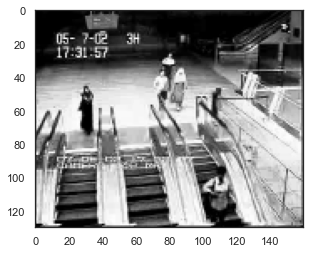

In [27]:
video0 = video_df[1].values.reshape(video_col, video_row).T
print(video0.shape)
sns.set(context='notebook', style='white', font_scale=1)
plt.imshow(video0, cmap="gray")

In [28]:
X = video_df.values
X.shape

(20800, 200)

In [29]:
n = video_df.shape[1]
d = video0.size
r = 1

In [30]:
U_0 = np.random.randn(d, r)
V_0 = np.random.randn(n, r)

In [31]:
U_result,V_result,error_list  = subgradient(X, U_0, V_0,0.001,True)

100%|██████████| 2000/2000 [02:16<00:00, 14.64it/s]


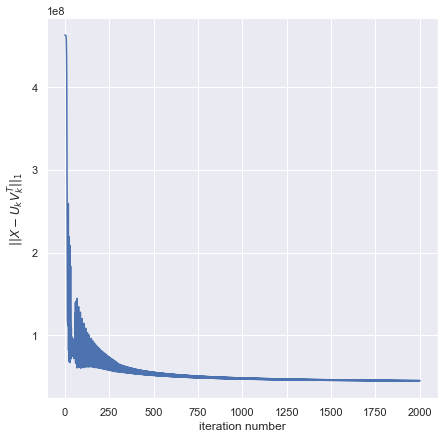

In [32]:
sns.set(context='notebook', style='darkgrid', font_scale=1)
plt.figure(figsize=(7,7))
plt.plot(error_list)
plt.xlabel('iteration number')
plt.ylabel(r"$||X-U_kV_k^{T}||_1$")
plt.savefig('Figure 9.pdf')
plt.show()

In [33]:
L_hat = np.dot(U_result, V_result.T)
S_hat = X - L_hat

  0%|          | 1/200 [00:00<00:30,  6.52it/s]<ipython-input-19-0de6a6b03a27>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(131)
<ipython-input-19-0de6a6b03a27>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(132)
<ipython-input-19-0de6a6b03a27>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a n

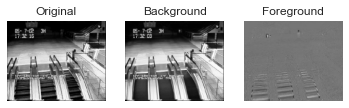

In [19]:
for i in tqdm(range(n)):
    
    plt.subplot(131)
    plt.imshow(X[:, i].reshape(video_col, video_row).T, cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(L_hat[:, i].reshape(video_col, video_row).T, cmap='gray')
    plt.title("Background")
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(S_hat[:, i].reshape(video_col, video_row).T, cmap='gray')
    plt.title("Foreground")
    plt.axis('off')
    
    plt.savefig('../result/{}.jpg'.format(i), dpi=200)

In [20]:
size = cv2.imread('../result/0.jpg').shape
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
fps = 10
videowrite = cv2.VideoWriter('result.mp4', fourcc, fps, (size[1], size[0]))
for i in tqdm(range(n)):
    video = cv2.imread('../result/{}.jpg'.format(i))
    videowrite.write(video)
videowrite.release()

100%|██████████| 200/200 [00:02<00:00, 95.59it/s]
